In [1]:
#%run "../app/dreams"
from sys import path
path.insert(0,'../app')
from dreams import dreams_mastersheet

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = dreams_mastersheet

# Base Cohorte

In [4]:
base_cohort = df[
    (df.age_range!="not_valid_age")
    &(df.age_range!="25-29")
    &(df.timeOn_system=="required_Time_on")
]
base_cohort.code.count()

19728

# Number of Curriculum completion Per Last session taken

In [5]:
curriculum_complet = base_cohort[
    (base_cohort.dreams_curriculum=="curriculum_completed")
]
curriculum_complet.code.count()

16555

In [6]:
curriculum_complet.pivot_table(index="actual_departement",columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_date_end_fy,FY20Q2,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,errata,Grand Total
actual_departement,,,,,,,,,
Artibonite,0,421,4891,40,0,1076,1091,1,7520
Nord,0,2,991,1,0,515,357,0,1866
Ouest,2,318,3250,113,139,1452,1895,0,7169
Grand Total,2,741,9132,154,139,3043,3343,1,16555


In [7]:
curriculum_complet.pivot_table(index=["actual_departement",'actual_commune'],columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_date_end_fy                             FY20Q2  FY20Q3  FY20Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      20     456   
                   Dessalines                           0      92     688   
                   Grande Saline                        0      90     841   
                   La Chapelle                          0      38     233   
                   Liancourt                            0      13     130   
                   Montrouis                            0      15     272   
                   Petite Rivière de l'Artibonite       0      32     378   
                   Saint-Marc                           0      58     583   
                   Verrettes                            0      63    1310   
Nord               Cap-Haïtien                          0       1     490   
                   Limonade                             0       0     232   
                   Milot                                0       0     126   
                   Plaine-du-Nord                       0       1     103   
                   Quartier-Morin                       0       0      40   
Ouest              Carrefour                            0     103     798   
                   Delmas                               0      56     249   
                   Gressier                             0      26     260   
                   Kenscoff                             0      83    1138   
                   Port-au-Prince                       2       4     423   
                   Pétionville                          0      18     179   
                   Tabarre                              0      28     203   
Grand Total                                             2     741    9132   

curriculum_date_end_fy                             FY21Q1  FY21Q2  FY21Q3  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0       0      52   
                   Dessalines                           1       0     200   
                   Grande Saline                        0       0      41   
                   La Chapelle                         27       0     113   
                   Liancourt                            0       0      54   
                   Montrouis                           12       0      24   
                   Petite Rivière de l'Artibonite       0       0     159   
                   Saint-Marc                           0       0     246   
                   Verrettes                            0       0     187   
Nord               Cap-Haïtien                          0       0     138   
                   Limonade                             0       0     210   
                   Milot                                0       0     109   
                   Plaine-du-Nord                       1       0      46   
                   Quartier-Morin                       0       0      12   
Ouest              Carrefour                           73       0     154   
                   Delmas                               4       0     145   
                   Gressier                             9       0     322   
                   Kenscoff                             0     138     561   
                   Port-au-Prince                      14       0     109   
                   Pétionville                          0       1      80   
                   Tabarre                             13       0      81   
Grand Total                                           154     139    3043   

curriculum_date_end_fy                             FY21Q4  errata  Grand Total  
actual_departement actual_commune                                               
Artibonite         Desdunes                            72       0          600  
                   Dessalines                         170  

In [8]:

curriculum_complet_pres = curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy!="FY20Q2")
    &(curriculum_complet.curriculum_date_end_fy!="errata")
]

In [9]:
curriculum_dept = curriculum_complet_pres.pivot_table(index="actual_departement",columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
curriculum_dept

curriculum_date_end_fy,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,Grand Total
actual_departement,,,,,,,
Artibonite,421,4891,40,0,1076,1091,7519
Nord,2,991,1,0,515,357,1866
Ouest,318,3250,113,139,1452,1895,7167
Grand Total,741,9132,154,139,3043,3343,16552


In [10]:
curriculum_commune_dept = curriculum_complet_pres.pivot_table(index=["actual_departement",'actual_commune'],columns="curriculum_date_end_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_commune_dept

curriculum_date_end_fy                             FY20Q3  FY20Q4  FY21Q1  \
actual_departement actual_commune                                           
Artibonite         Desdunes                            20     456       0   
                   Dessalines                          92     688       1   
                   Grande Saline                       90     841       0   
                   La Chapelle                         38     233      27   
                   Liancourt                           13     130       0   
                   Montrouis                           15     272      12   
                   Petite Rivière de l'Artibonite      32     378       0   
                   Saint-Marc                          58     583       0   
                   Verrettes                           63    1310       0   
Nord               Cap-Haïtien                          1     490       0   
                   Limonade                             0     232       0   
                   Milot                                0     126       0   
                   Plaine-du-Nord                       1     103       1   
                   Quartier-Morin                       0      40       0   
Ouest              Carrefour                          103     798      73   
                   Delmas                              56     249       4   
                   Gressier                            26     260       9   
                   Kenscoff                            83    1138       0   
                   Port-au-Prince                       4     423      14   
                   Pétionville                         18     179       0   
                   Tabarre                             28     203      13   
Grand Total                                           741    9132     154   

curriculum_date_end_fy                             FY21Q2  FY21Q3  FY21Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      52      72   
                   Dessalines                           0     200     170   
                   Grande Saline                        0      41      89   
                   La Chapelle                          0     113     179   
                   Liancourt                            0      54      46   
                   Montrouis                            0      24      48   
                   Petite Rivière de l'Artibonite       0     159      96   
                   Saint-Marc                           0     246     229   
                   Verrettes                            0     187     162   
Nord               Cap-Haïtien                          0     138      34   
                   Limonade                             0     210     105   
                   Milot                                0     109      15   
                   Plaine-du-Nord                       0      46     178   
                   Quartier-Morin                       0      12      25   
Ouest              Carrefour                            0     154     518   
                   Delmas                               0     145     134   
                   Gressier                             0     322     101   
                   Kenscoff                           138     561     815   
                   Port-au-Prince                       0     109     129   
                   Pétionville                          1      80      87   
                   Tabarre                              0      81     111   
Grand Total                                           139    3043    3343   

curriculum_date_end_fy                             Grand Total  
actual_departement actual_commune                               
Artibonite         Desdunes                                600  
                   Dessalines                             1151  
                   Grande Saline          

In [11]:
all_curriculum_trim = pd.ExcelWriter(f"curriculum_trim.xlsx",engine="xlsxwriter")
curriculum_dept.to_excel(all_curriculum_trim,sheet_name="depart",index=True,na_rep="NULL")
curriculum_commune_dept.to_excel(all_curriculum_trim,sheet_name="commune_depart",index=True,na_rep="NULL")
all_curriculum_trim.save()

In [12]:

Q3Q4FY20_curriculum = curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY20Q3")
].code.count() + curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY20Q4")
].code.count() 

curriculum_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
            ],
    "data": [
        Q3Q4FY20_curriculum,
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q1")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q2")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q3")
].code.count(),
        curriculum_complet[
    (curriculum_complet.curriculum_date_end_fy=="FY21Q4")
].code.count()
    ]    
})
curriculum_schema

,state,data
0,Q3FY20-Q4FY20,9873
1,FY21Q1,154
2,FY21Q2,139
3,FY21Q3,3043
4,FY21Q4,3343


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW and their completion period of the curriculum')

Text(9875.0, 0.0, '9873')

Text(156.0, 1.0, '154')

Text(141.0, 2.0, '139')

Text(3045.0, 3.0, '3043')

Text(3345.0, 4.0, '3343')

Text(-80, -20, 'source: HIVHaiti')

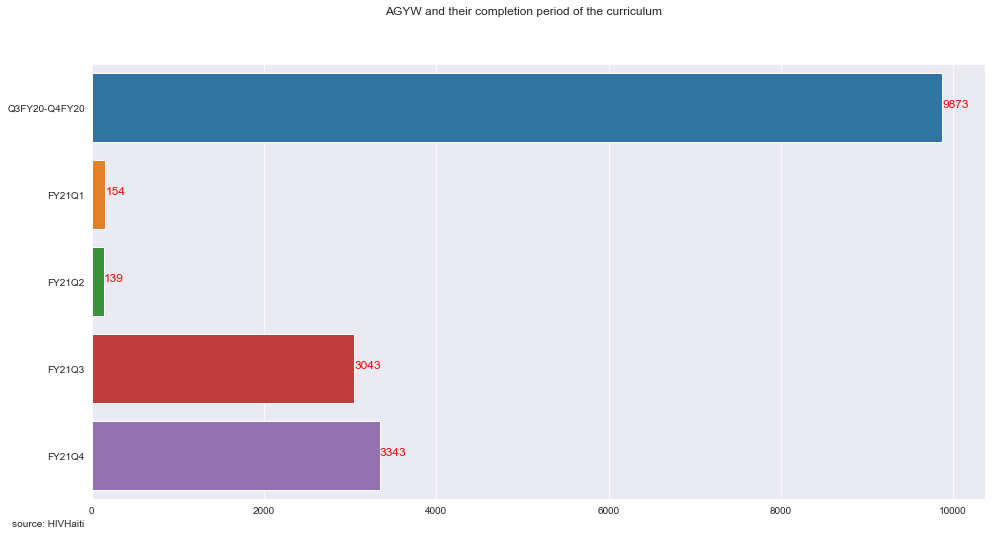

In [13]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW and their completion period of the curriculum")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Curriculum_complete_trim",dpi=400)

# Number of condoms received per quarter 

In [14]:
condoms_tested = base_cohort[
    (base_cohort.condoms=="tested_on_given_date")
]
condoms_tested.code.count()

condoms_sens = base_cohort[
    (base_cohort.new_condoms=="sensOuRecu")
    &(base_cohort.condoms=="errata")
]
condoms_sens.code.count()

condoms_tested_sens = base_cohort[
    (base_cohort.new_condoms=="sensOuRecu")
]
condoms_tested_sens.code.count()



3399

389

3788

In [15]:
condoms_tested_sens.pivot_table(index="actual_departement",columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

condoms_fy,FY20Q2,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,errata,Grand Total
actual_departement,,,,,,,,,
Artibonite,1,75,782,4,14,411,336,253,1876
Nord,0,1,83,0,0,8,40,26,158
Ouest,0,69,607,2,56,323,587,110,1754
Grand Total,1,145,1472,6,70,742,963,389,3788


In [16]:
condoms_qarter = condoms_tested_sens[
    (condoms_tested_sens.condoms_fy!="FY20Q2")
]

In [17]:
condoms_dept = condoms_qarter.pivot_table(index="actual_departement",columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
condoms_dept.rename(columns={"errata":"sensibilise"},inplace=True)
condoms_dept

condoms_fy,FY20Q3,FY20Q4,FY21Q1,FY21Q2,FY21Q3,FY21Q4,sensibilise,Grand Total
actual_departement,,,,,,,,
Artibonite,75,782,4,14,411,336,253,1875
Nord,1,83,0,0,8,40,26,158
Ouest,69,607,2,56,323,587,110,1754
Grand Total,145,1472,6,70,742,963,389,3787


In [18]:
condoms_dept_commune = condoms_qarter.pivot_table(index=["actual_departement","actual_commune"],columns="condoms_fy",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
condoms_dept_commune.rename(columns={"errata":"sensibilise"},inplace=True)
condoms_dept_commune

condoms_fy                                         FY20Q3  FY20Q4  FY21Q1  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      90       0   
                   Dessalines                          29     122       0   
                   Grande Saline                        5      52       2   
                   La Chapelle                          1       1       0   
                   Liancourt                            0      70       0   
                   Montrouis                            0      41       0   
                   Petite Rivière de l'Artibonite       4     133       0   
                   Saint-Marc                           9     147       2   
                   Verrettes                           27     126       0   
Nord               Cap-Haïtien                          1      17       0   
                   Limonade                             0      42       0   
                   Milot                                0      19       0   
                   Plaine-du-Nord                       0       5       0   
                   Quartier-Morin                       0       0       0   
Ouest              Carrefour                            1     102       0   
                   Delmas                              11      41       0   
                   Gressier                             0      86       0   
                   Kenscoff                            54     283       1   
                   Port-au-Prince                       0      30       0   
                   Pétionville                          0      14       0   
                   Tabarre                              3      51       1   
Grand Total                                           145    1472       6   

condoms_fy                                         FY21Q2  FY21Q3  FY21Q4  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             0      46      14   
                   Dessalines                           0      13       1   
                   Grande Saline                        0      10      57   
                   La Chapelle                          0       0      16   
                   Liancourt                            0      34      42   
                   Montrouis                            0       0       1   
                   Petite Rivière de l'Artibonite       5      47       7   
                   Saint-Marc                           0      88     165   
                   Verrettes                            9     173      33   
Nord               Cap-Haïtien                          0       0       6   
                   Limonade                             0       2      15   
                   Milot                                0       6       0   
                   Plaine-du-Nord                       0       0      19   
                   Quartier-Morin                       0       0       0   
Ouest              Carrefour                            0      42      51   
                   Delmas                               0       5       6   
                   Gressier                             0      53       8   
                   Kenscoff                            56     200     391   
                   Port-au-Prince                       0      17      92   
                   Pétionville                          0       6      30   
                   Tabarre                              0       0       9   
Grand Total                                            70     742     963   

condoms_fy                                         sensibilise  Grand Total  
actual_departement actual_commune                                            
Artibonite         Desdunes                                 14          164  
                   Dessalines                               27      

In [19]:
Q3Q4FY20_condoms = condoms_qarter[
    (condoms_qarter.condoms_fy=="FY20Q3")
].code.count() + condoms_qarter[
    (condoms_qarter.condoms_fy=="FY20Q4")
].code.count() 

condoms_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
                "Sensibilise"
            ],
    "data": [
        Q3Q4FY20_condoms,
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q1")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q2")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q3")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="FY21Q4")
].code.count(),
        condoms_qarter[
    (condoms_qarter.condoms_fy=="errata")
].code.count()
        
]})

condoms_schema

,state,data
0,Q3FY20-Q4FY20,1617
1,FY21Q1,6
2,FY21Q2,70
3,FY21Q3,742
4,FY21Q4,963
5,Sensibilise,389


In [20]:
sens_condoms_dept = condoms_sens.pivot_table(index="actual_departement",columns="fiscal_year",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_condoms_dept

fiscal_year,FY21Q1,FY21Q2,FY21Q3,FY21Q4,Q3fy20-Q4fy20,Grand Total
actual_departement,,,,,,
Artibonite,34,53,74,29,63,253
Nord,0,0,2,4,20,26
Ouest,16,26,13,18,37,110
Grand Total,50,79,89,51,120,389


In [21]:
sens_condoms_dept_commune = condoms_sens.pivot_table(index=["actual_departement","actual_commune"],columns="fiscal_year",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_condoms_dept_commune

fiscal_year                                        FY21Q1  FY21Q2  FY21Q3  \
actual_departement actual_commune                                           
Artibonite         Desdunes                             5       6       1   
                   Dessalines                           5       1       1   
                   La Chapelle                          6      31       0   
                   Liancourt                            1       0       0   
                   Montrouis                            1       5      24   
                   Petite Rivière de l'Artibonite      16       9       9   
                   Saint-Marc                           0       1      39   
Nord               Cap-Haïtien                          0       0       0   
                   Limonade                             0       0       1   
                   Quartier-Morin                       0       0       1   
Ouest              Carrefour                            0       5       0   
                   Delmas                               0       6       0   
                   Port-au-Prince                       0       6       6   
                   Pétionville                         16       9       4   
                   Tabarre                              0       0       3   
Grand Total                                            50      79      89   

fiscal_year                                        FY21Q4  Q3fy20-Q4fy20  \
actual_departement actual_commune                                          
Artibonite         Desdunes                             0              2   
                   Dessalines                           0             20   
                   La Chapelle                          0              8   
                   Liancourt                            0              0   
                   Montrouis                            0              2   
                   Petite Rivière de l'Artibonite       6             14   
                   Saint-Marc                          23             17   
Nord               Cap-Haïtien                          0              1   
                   Limonade                             0              7   
                   Quartier-Morin                       4             12   
Ouest              Carrefour                            1              0   
                   Delmas                               0              4   
                   Port-au-Prince                       4              9   
                   Pétionville                          0             23   
                   Tabarre                             13              1   
Grand Total                                            51            120   

fiscal_year                                        Grand Total  
actual_departement actual_commune                               
Artibonite         Desdunes                                 14  
                   Dessalines                               27  
                   La Chapelle                              45  
                   Liancourt                                 1  
                   Montrouis                                32  
                   Petite Rivière de l'Artibonite           54  
                   Saint-Marc                               80  
Nord               Cap-Haïtien                               1  
                   Limonade                                  8  
                   Quartier-Morin                           17  
Ouest              Carrefour                                 6  
                   Delmas                                   10  
                   Port-au-Prince                           25  
                   Pétionville                              52  
                   Tabarre                                  17  
Grand Total                                                389

In [22]:
sens_condoms_schema = pd.DataFrame({
    "state":["Q3FY20-Q4FY20",
                "FY21Q1",
                "FY21Q2",
                "FY21Q3",
                "FY21Q4",
            ],
    "data": [
        condoms_sens[
    (condoms_sens.fiscal_year=="Q3fy20-Q4fy20")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q1")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q2")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q3")
].code.count(),
        condoms_sens[
    (condoms_sens.fiscal_year=="FY21Q4")
].code.count()        
]})

sens_condoms_schema

,state,data
0,Q3FY20-Q4FY20,120
1,FY21Q1,50
2,FY21Q2,79
3,FY21Q3,89
4,FY21Q4,51


In [23]:
all_condoms_trim = pd.ExcelWriter(f"condoms_trim.xlsx",engine="xlsxwriter")
condoms_dept.to_excel(all_condoms_trim,sheet_name="condoms_depart",index=True,na_rep="NULL")
condoms_dept_commune.to_excel(all_condoms_trim,sheet_name="condoms_commune_depart",index=True,na_rep="NULL")
sens_condoms_dept.to_excel(all_condoms_trim,sheet_name="sens_condoms_depart",index=True,na_rep="NULL")
sens_condoms_dept_commune.to_excel(all_condoms_trim,sheet_name="sens_condoms_commune_depart",index=True,na_rep="NULL")
all_condoms_trim.save()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW and their completion period of the condom')

Text(1619.0, 0.0, '1617')

Text(8.0, 1.0, '6')

Text(72.0, 2.0, '70')

Text(744.0, 3.0, '742')

Text(965.0, 4.0, '963')

Text(391.0, 5.0, '389')

Text(-80, -20, 'source: HIVHaiti')

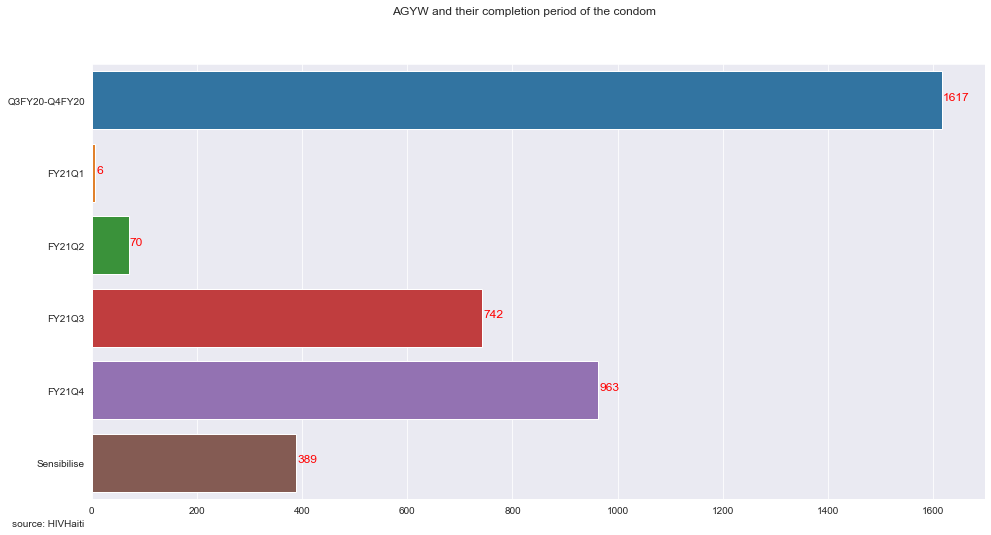

In [24]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=condoms_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW and their completion period of the condom")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Condom_complete_trim",dpi=400)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW, condoms awareness, enroled in a given Quarter')

Text(122.0, 0.0, '120')

Text(52.0, 1.0, '50')

Text(81.0, 2.0, '79')

Text(91.0, 3.0, '89')

Text(53.0, 4.0, '51')

Text(-80, -20, 'source: HIVHaiti')

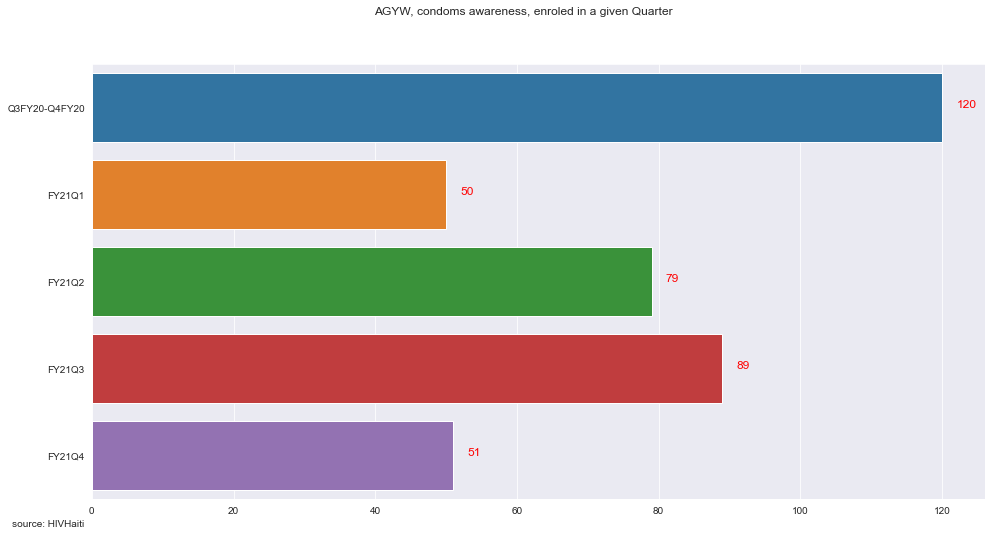

In [25]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=sens_condoms_schema)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW, condoms awareness, enroled in a given Quarter")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("Awareness_condom_trim",dpi=400)

# Number of AGYW tested for HIV